In [1]:
import os
import glob

import tables as tb
import numpy  as np
import pandas as pd


from collections import defaultdict
from scipy import interpolate

from invisible_cities.io import mcinfo_io as mcio
from invisible_cities.core import core_functions as coref

In [2]:
import matplotlib        as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib notebook
%matplotlib inline
### Useful parameters for plots
mpl.rcParams["figure.figsize"]          = 12,10
mpl.rcParams["font.size"]               = 20
mpl.rcParams["figure.max_open_warning"] = 100
mpl.rcParams["font.size"]               = 20
mpl.rcParams["font.weight"]             ='normal'
mpl.rcParams["axes.labelweight"] = "normal"
mpl.rcParams['axes.facecolor'] = 'w'
mpl.rcParams['figure.facecolor'] = 'w';

In [3]:
pressures = np.array([1.58, 2.61, 3.52, 4.52, 5.59, 6.65, 7.62, 8.44])[1:]

source = '241Am'
gas    = 'Ar'

wi         = 26.4
el_dist    = 1
drift_dist = 8.7

alpha_ene = 5.49 * 1e6 # MeV to eV

ws_p = [2.03, 4.05, 6.08, 7.09, 8.10, 10.1]
ws_v = [50.6, 46.3, 36.0, 32.1, 28.9, 25.3]
ws_fun       = interpolate.interp1d(ws_p, ws_v, kind='linear', fill_value='extrapolate')

dst_path = '/home/ander/Work/GaP/real_data/241Am/LCE_Study/LCE_and_drift.h5'

### S1e vs field

In [4]:
data_points = []

for p in pressures:
    data = pd.read_hdf(dst_path, f'{source}_{p:.2f}bar_{gas}')
    data_points.append(data[data.cath_volt>=0])
    
dst = pd.concat(data_points).reset_index()
emitted_phot = alpha_ene/ws_fun(dst.pressure)


#### With and without S2

Text(0.5, 0, 'Reduced drift field (V/cm/bar)')

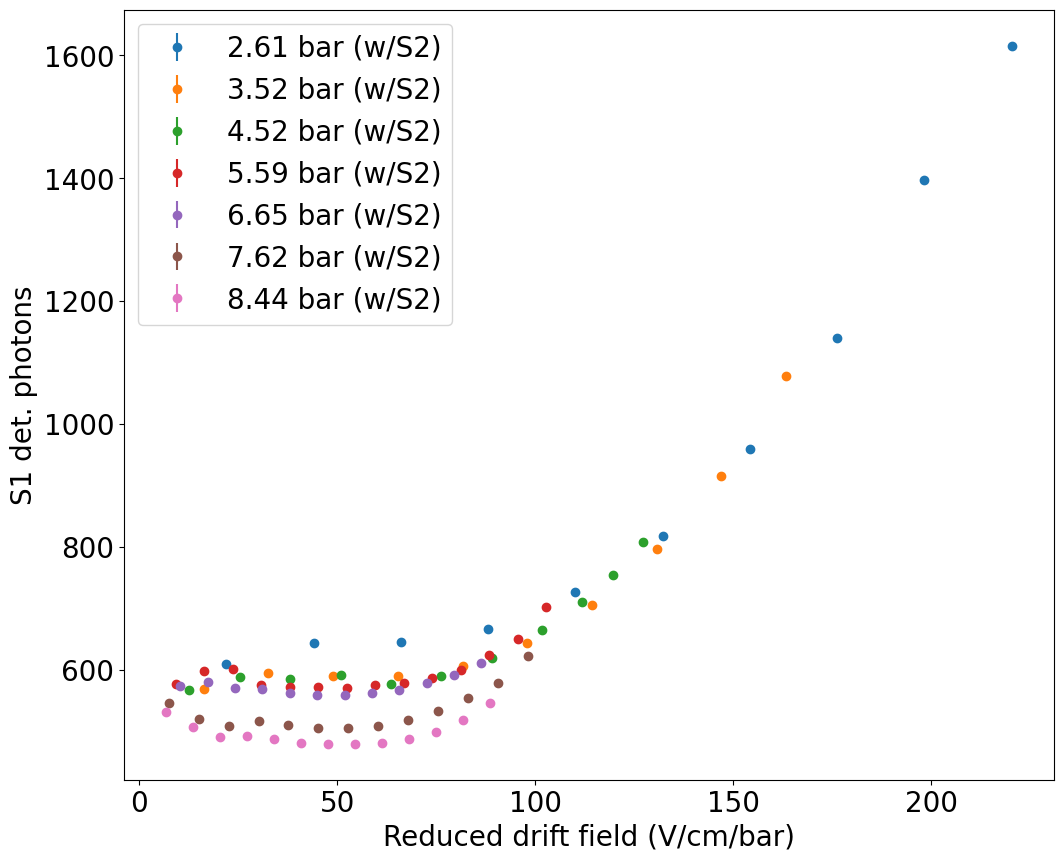

In [5]:
xvar   = 'drift_field_red'
yvar   = 's1_photons'
yvar_e = 's1_photons_e'

plist = pressures[:]

for p in plist:
    #sel  = (dst.pressure==p) & (dst.cath_volt>0) & (dst.s2_photons==0)
    #data = dst[sel]
    #plt.errorbar(data[xvar], data[yvar], yerr=data[yvar_e], ls='', marker='o', label=f'{p} bar (wo/S2)')
    
    sel  = (dst.pressure==p) & (dst.drift_field>0)# & (dst.s2_photons > 0)
    data = dst[sel]
    plt.errorbar(data[xvar], data[yvar], yerr=data[yvar_e], ls='', marker='o', label=f'{p} bar (w/S2)')
    
    #sel  = (dst.pressure==p) & (dst.cath_volt==0)
    #data = dst[sel]
    #plt.errorbar(data[xvar], data[yvar], yerr=data[yvar_e], ls='', marker='o', label=f'{p} bar (no field)')
    
plt.legend()
plt.ylabel('S1 det. photons')
plt.xlabel('Drift field (V/cm)')
plt.xlabel('Reduced drift field (V/cm/bar)')

In [6]:
data.s2_photons

82    35100.0
83    34700.0
84    34500.0
85    34300.0
86    33900.0
87    33300.0
88    33100.0
89    32300.0
90    31700.0
91    30300.0
92        0.0
93        0.0
94        0.0
Name: s2_photons, dtype: float64

#### vs Slice

Text(0.5, 0, 'Drift field (V/cm)')

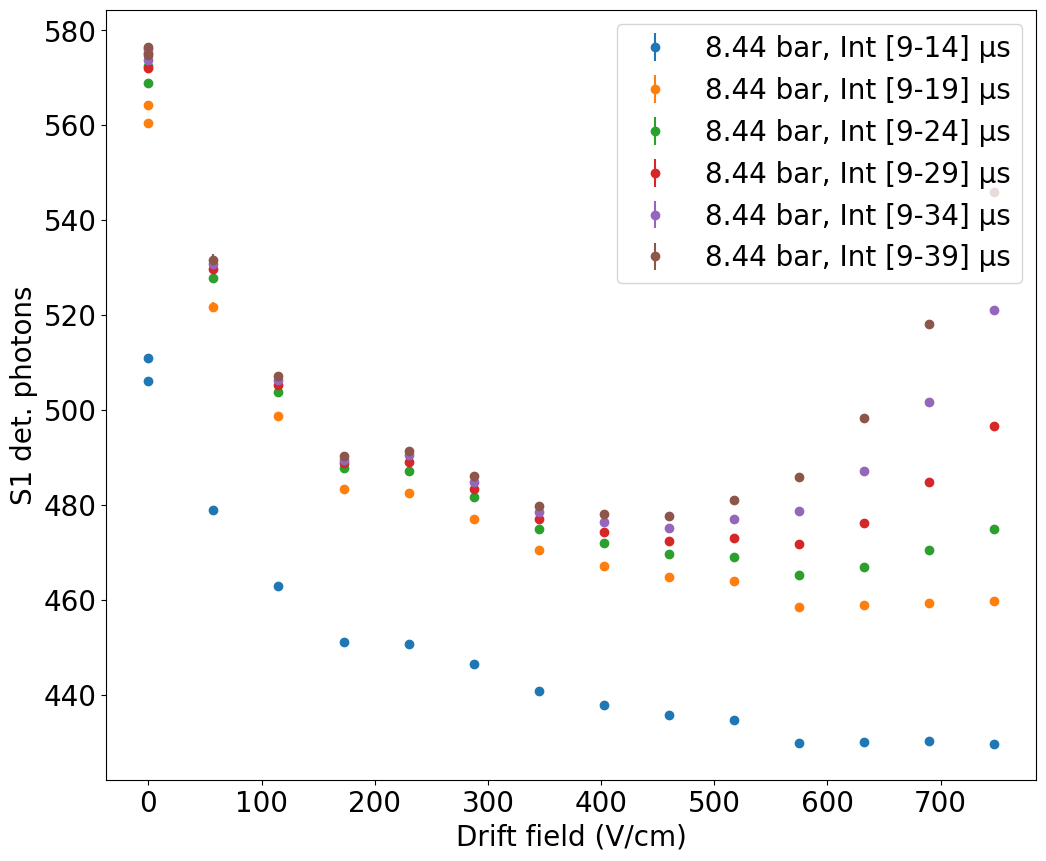

In [7]:
xvar   = 'drift_field'
labels = [f'[9-{5*(i+1)+9}] µs' for i in range(6)]
for ii in range(6):
    yvar   = f's1_photons_{ii}'
    yvar_e = f's1_photons_{ii}_e'
    for p in pressures[-1:]:
        sel  = (dst.pressure==p) #& (dst.cath_volt>0) & (dst.s2_photons==0)
        data = dst[sel]
        plt.errorbar(data[xvar], data[yvar], yerr=data[yvar_e], ls='', marker='o', label=f'{p} bar, Int {labels[ii]}')
        
plt.legend()
plt.ylabel('S1 det. photons')
plt.xlabel('Drift field (V/cm)')

Text(0.5, 0, 'Drift field (V/cm)')

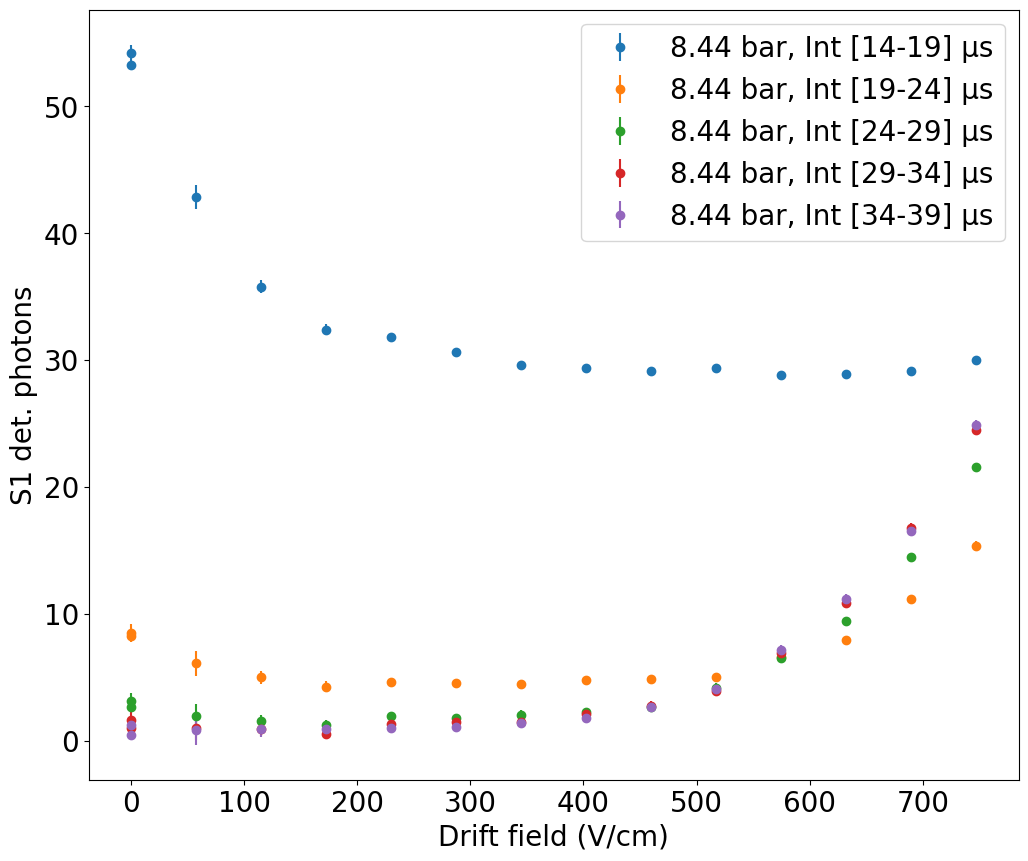

In [8]:
xvar   = 'drift_field'
labels = [f'[{5*(i)+9}-{5*(i+1)+9}] µs' for i in range(6)]

for ii in range(1, 6):
    yvar   = f's1_photons_d{ii}'
    yvar_e = f's1_photons_{ii}_e'
    for p in pressures[-1:]:
        sel  = (dst.pressure==p) #& (dst.cath_volt>0) & (dst.s2_photons==0)
        data = dst[sel]
        plt.errorbar(data[xvar], data[yvar], yerr=data[yvar_e], ls='', marker='o', label=f'{p} bar, Int {labels[ii]}')
        
        
plt.legend()
plt.ylabel('S1 det. photons')
plt.xlabel('Drift field (V/cm)')

In [9]:
data_points = []

for p in pressures:
    data = pd.read_hdf(dst_path, f'{source}_{p:.2f}bar_{gas}')
    data_points.append(data[data.cath_volt==0])
    
dst = pd.concat(data_points).reset_index()
emitted_phot = alpha_ene/ws_fun(dst.pressure)

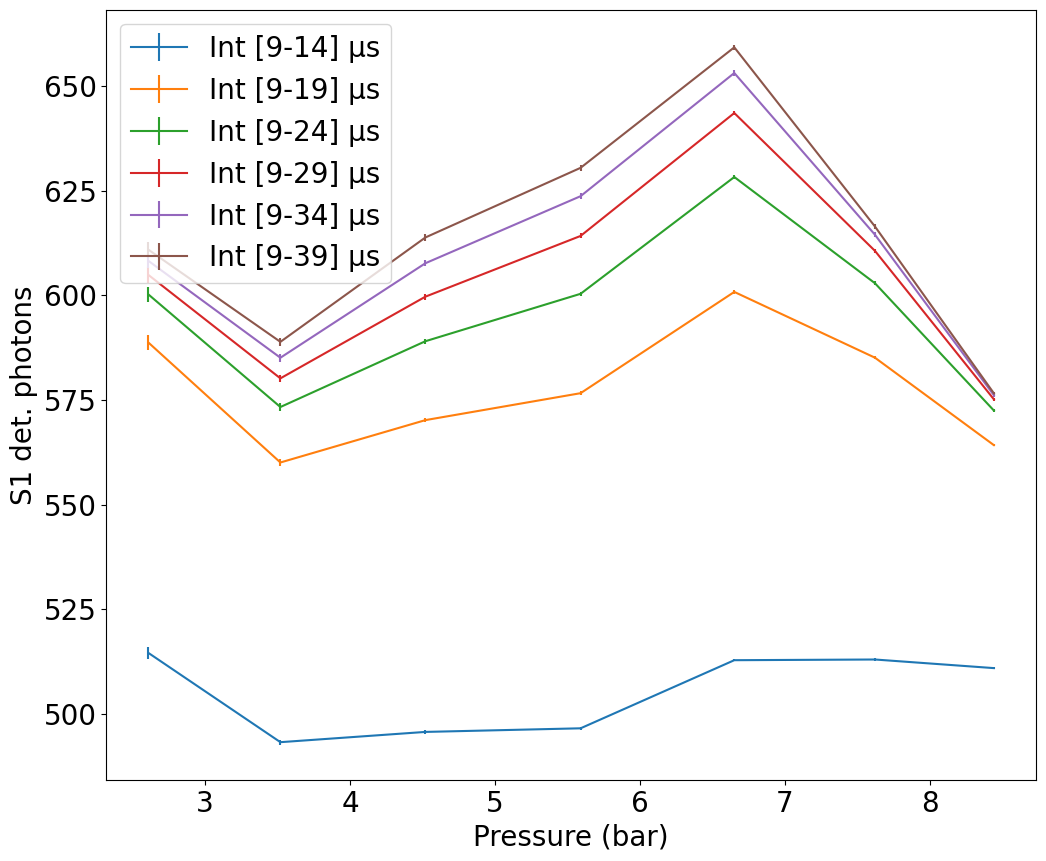

In [10]:
labels = [f'[9-{5*(i+1)+9}] µs' for i in range(6)]
for i in range(0,6):
    var   = f's1_photons_{i}'
    var_e = f's1_photons_{i}_e'
    plt.errorbar(dst.pressure, dst[var], yerr=dst[var_e], label=f'Int {labels[i]}')

var   = f's1_photons'
var_e = f's1_photons_{i}_e'

#plt.errorbar(dst.pressure, dst[var], yerr=dst[var_e], label=f'{p} bar, Int Full')

plt.xlabel('Pressure (bar)')
plt.ylabel('S1 det. photons')  
#plt.yscale('log')
plt.legend(loc=2)

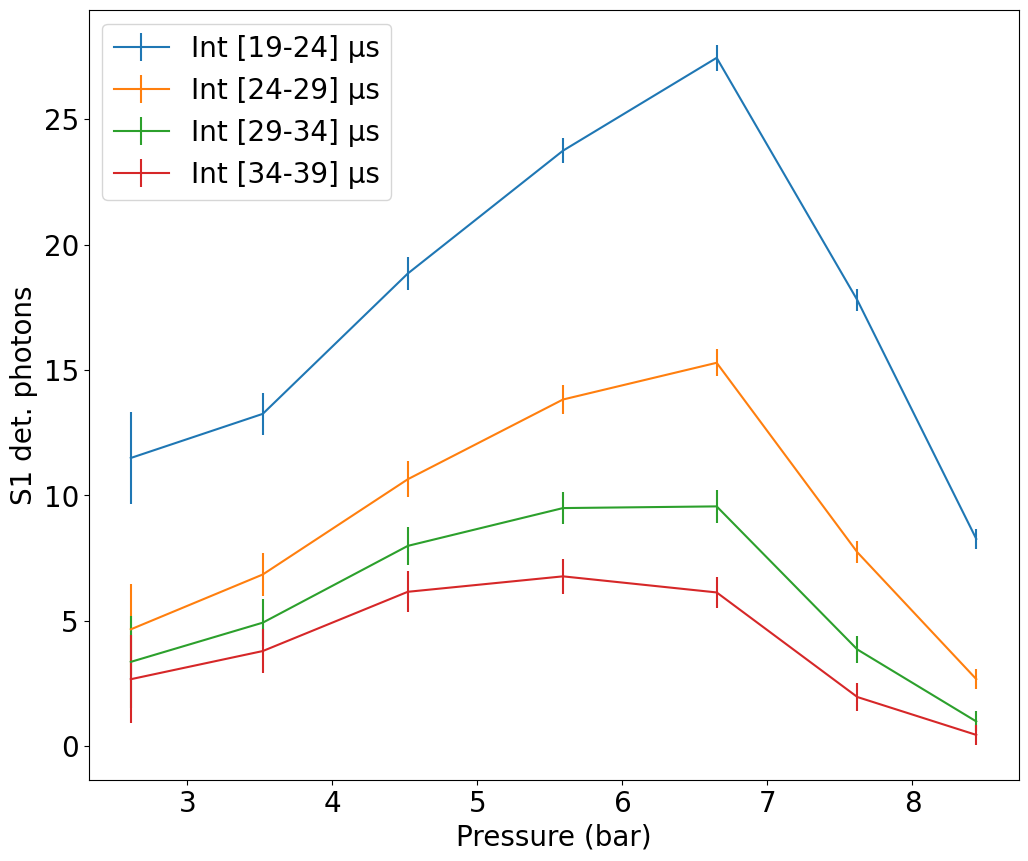

In [16]:
labels = [f'[{5*(i)+9}-{5*(i+1)+9}] µs' for i in range(6)]
for i in range(2,6):
    var   = f's1_photons_d{i}'
    var_e = f's1_photons_{i}_e'
    plt.errorbar(dst.pressure, dst[var], yerr=dst[var_e], label=f'Int {labels[i]}')

var   = f's1_photons'
var_e = f's1_photons_{i}_e'

#plt.errorbar(dst.pressure, dst[var], yerr=dst[var_e], label=f'{p} bar, Int Full')

plt.xlabel('Pressure (bar)')
plt.ylabel('S1 det. photons')  
#plt.yscale('log')
plt.legend(loc=2)

### LCE

In [19]:
emitted_phot/alpha_ene*1e6

array([20257.12509276, 21084.49454621, 22771.12217885, 25983.33482663,
       29586.66549492, 32872.25386493, 35350.67873303])

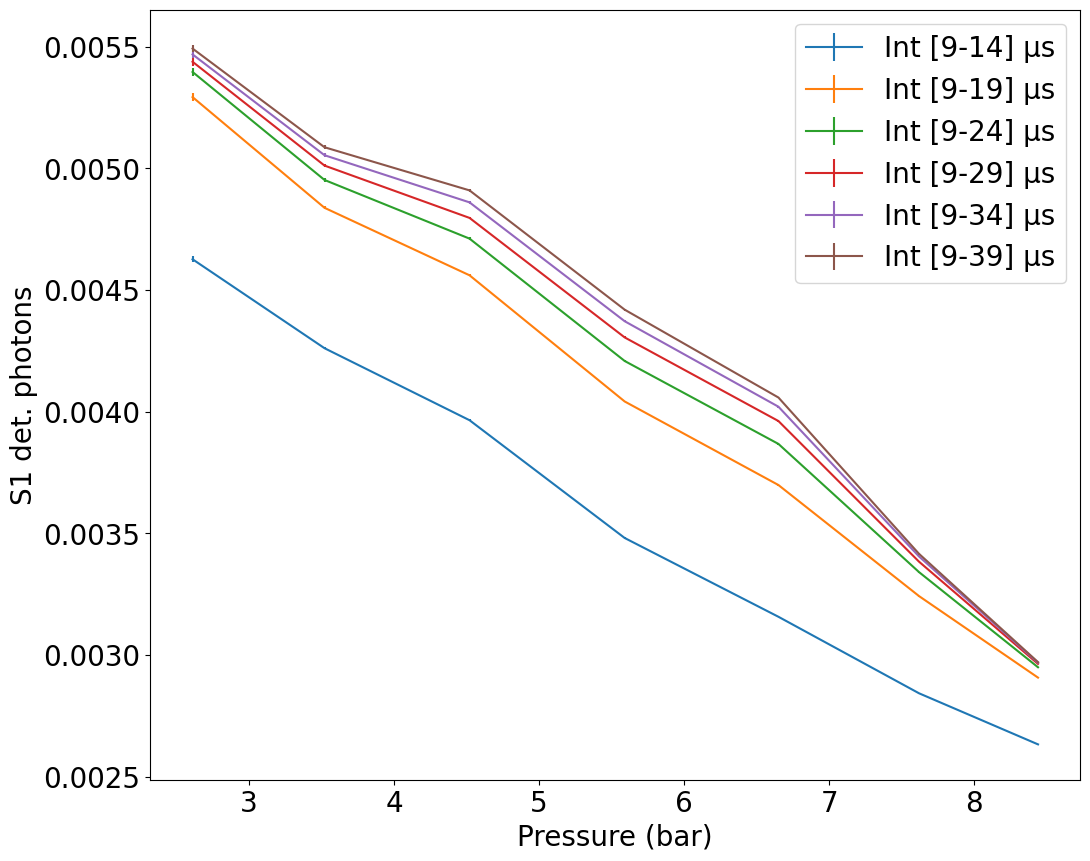

In [20]:
labels = [f'[9-{5*(i+1)+9}] µs' for i in range(6)]
for i in range(0,6):
    var   = f's1_photons_{i}'
    var_e = f's1_photons_{i}_e'
    plt.errorbar(dst.pressure, dst[var]/emitted_phot, yerr=dst[var_e]/emitted_phot, label=f'Int {labels[i]}')

var   = f's1_photons'
var_e = f's1_photons_{i}_e'

#plt.errorbar(dst.pressure, dst[var], yerr=dst[var_e], label=f'{p} bar, Int Full')

plt.xlabel('Pressure (bar)')
plt.ylabel('S1 det. photons')  
#plt.yscale('log')
plt.legend()

### Read MC data

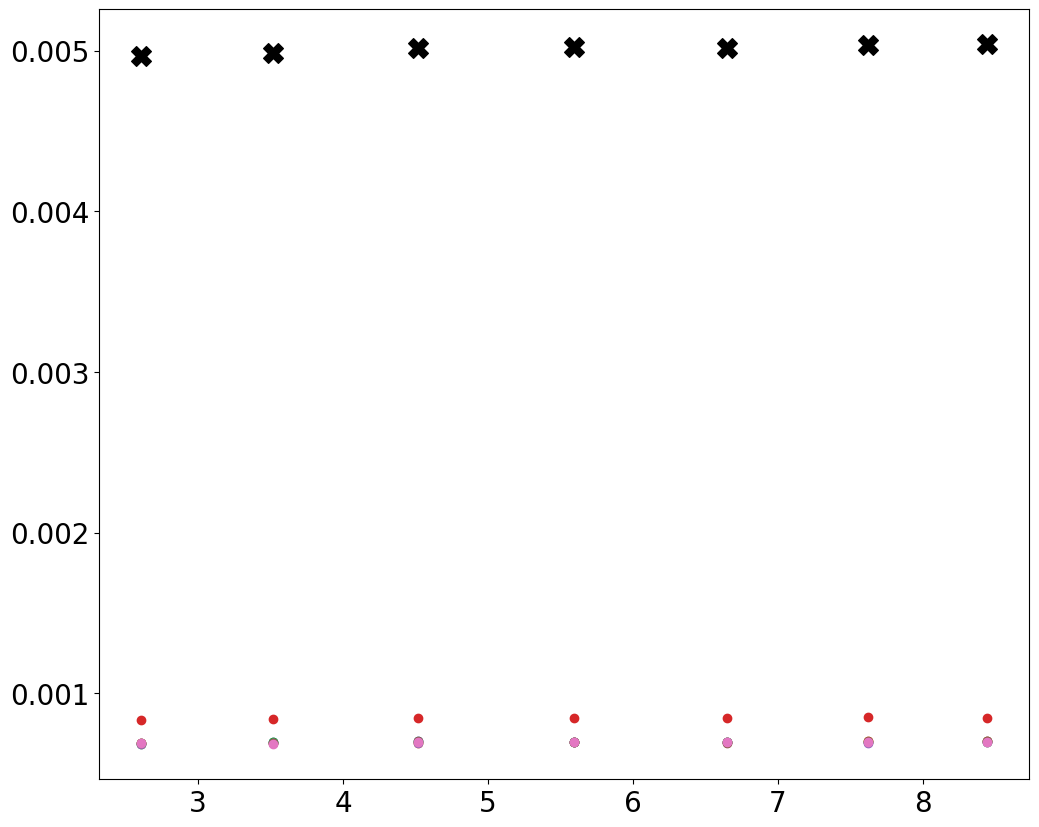

In [246]:
sim_phot   = []
yield_phot = []
alpha_e = 5.486

plist = pressures[:]
for p in plist:
#    input_path = glob.glob(f'/home/ander/Work/GaP/nexus_quick_sim/data/alpha_data/NoTPB_XeLight/alpha_{alpha_e:.3f}MeV_1e2_{p}bar_yield*.h5')[0]
    input_path = glob.glob(f'/home/ander/Work/GaP/nexus_quick_sim/data/alpha_{alpha_e:.3f}MeV_1e2_{p}bar_yield*.h5')[0]
    mcdata     = mcio.load_mcsensor_response_df(input_path).reset_index()
    hits       = mcio.load_mchits_df(input_path).reset_index()
    hits['total_energy'] = hits.groupby('event_id').energy.transform('sum')

    sel = hits.total_energy>5
    evt_id = hits[sel].event_id.unique()
    sel_evt = mcdata.event_id.isin(evt_id)
    
    all_sensors_mc = mcdata[sel_evt].groupby('event_id').charge.sum().reset_index()

    
    det_photons_mc = mcdata.groupby(['event_id', 'sensor_id']).charge.sum().reset_index()
    det_photons_mc = det_photons_mc[det_photons_mc.event_id.isin(all_sensors_mc.event_id.unique())]
    sim_phot.append([det_photons_mc[det_photons_mc.sensor_id==i].charge.mean() for i in range(7)])
    
    yid   = input_path.find('yield')
    yield_phot.append(int(input_path[yid+5:yid+10]))
    

yield_phot = np.array(yield_phot) * alpha_e
sim_phot   = np.array(sim_phot)

for i in range(7):
    plt.scatter(plist, sim_phot[:, i]/yield_phot);
#    plt.scatter(plist, sim_phot[:, i]);


plt.scatter(plist, sim_phot.sum(axis=1)/yield_phot, marker='X', s=200, c='k');

In [252]:
emitted_phot[0]

111211.6167592611

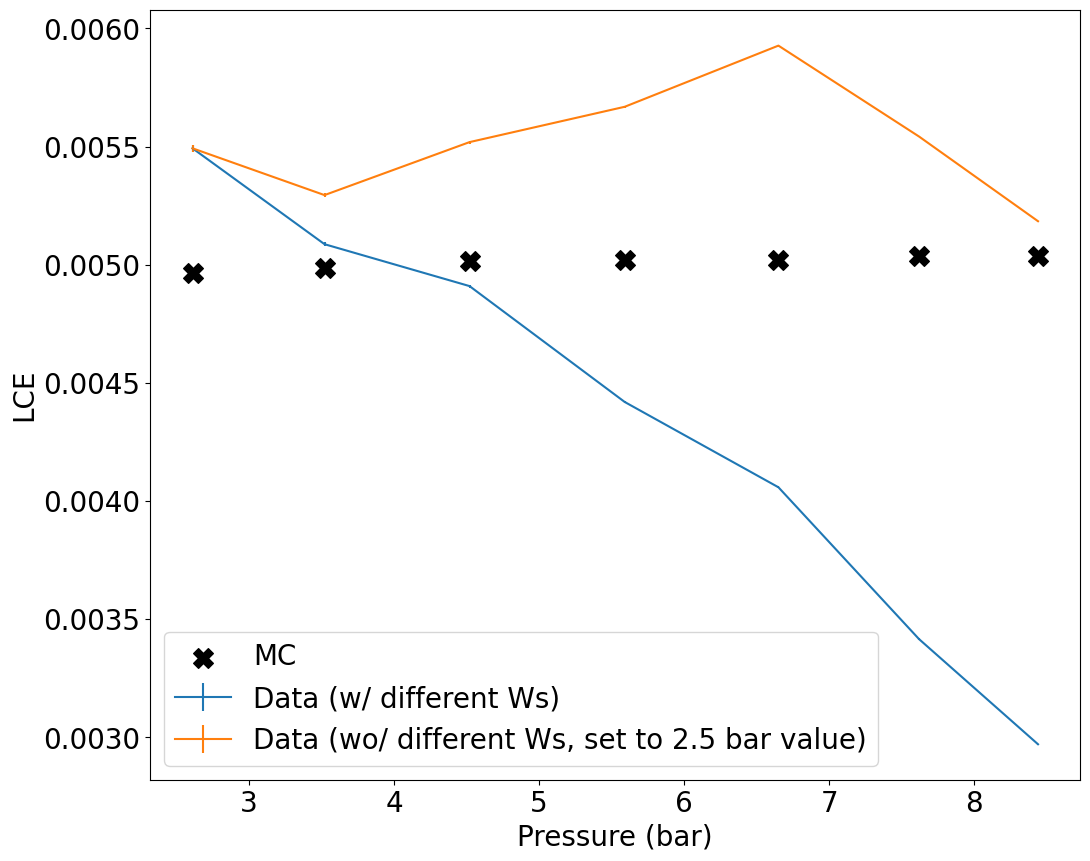

In [253]:
labels = [f'[9-{5*(i+1)+9}] µs' for i in range(6)]
for i in range(5,6):
    var   = f's1_photons_{i}'
    var_e = f's1_photons_{i}_e'
#    plt.errorbar(dst.pressure, dst[var]/emitted_phot, yerr=dst[var_e]/emitted_phot, label=f'Int {labels[i]}')
    plt.errorbar(dst.pressure, dst[var]/emitted_phot, yerr=dst[var_e]/emitted_phot, label=f'Data (w/ different Ws)')
    plt.errorbar(dst.pressure, dst[var]/emitted_phot[0], yerr=dst[var_e]/emitted_phot, label=f'Data (wo/ different Ws, set to 2.5 bar value)')

var   = f's1_photons'
var_e = f's1_photons_{i}_e'

#plt.errorbar(dst.pressure, dst[var], yerr=dst[var_e], label=f'{p} bar, Int Full')
plt.scatter(plist, sim_phot.sum(axis=1)/yield_phot, marker='X', s=200, c='k', label='MC');

plt.xlabel('Pressure (bar)')
plt.ylabel('LCE')  
#plt.yscale('log')
plt.legend()

### Central events at PMT

In [ ]:
sim_phot   = []
yield_phot = []
alpha_e = 5.486

plist = pressures[-1:]
for p in plist:
    input_path = glob.glob(f'/home/ander/Work/GaP/nexus_quick_sim/data/alpha_{alpha_e:.3f}MeV_1e2_{p}bar_yield*.h5')[0]
    mcdata     = mcio.load_mcsensor_response_df(input_path).reset_index()
    
    input_path = glob.glob(f'/home/ander/Work/GaP/nexus_quick_sim/data/alpha_{alpha_e:.3f}MeV_1e2_{p}bar_yield*.h5')[0]
    part = mcio.load_mcparticles_df(input_path).reset_index()
    part = part[part.particle_name=='alpha']
    sel = np.sqrt(part.final_x**2 + part.final_y**2) <5
    evt_id = part[sel].event_id.unique()
    sel_evt = mcdata.event_id.isin(evt_id)
    all_sensors_mc = mcdata[sel_evt].groupby('event_id').charge.sum().reset_index()
    all_sensors_mc = all_sensors_mc[all_sensors_mc.charge>50]
    
    det_photons_mc = mcdata[sel_evt].groupby(['event_id', 'sensor_id']).charge.sum().reset_index()
    det_photons_mc = det_photons_mc[det_photons_mc.event_id.isin(all_sensors_mc.event_id.unique())]
    sim_phot.append([det_photons_mc[det_photons_mc.sensor_id==i].charge.mean() for i in range(7)])
    
    yid   = input_path.find('yield')
    yield_phot.append(int(input_path[yid+5:yid+10]))
    


yield_phot = np.array(yield_phot) * alpha_e
sim_phot   = np.array(sim_phot)

for i in range(7):
    plt.scatter(plist, sim_phot[:, i]/yield_phot);


#plt.scatter(plist, sim_phot.sum(axis=1)/yield_phot, marker='X', s=200, c='k');

In [ ]:
input_path = glob.glob(f'/home/ander/Work/GaP/nexus_quick_sim/data/alpha_{alpha_e:.3f}MeV_1e2_{p}bar_yield*.h5')[0]
mcdata     = mcio.load_mcsensor_response_df(input_path).reset_index()

### Light collection MC w/ optical photons

#### vs Drift distance

Text(0, 0.5, 'LCE')

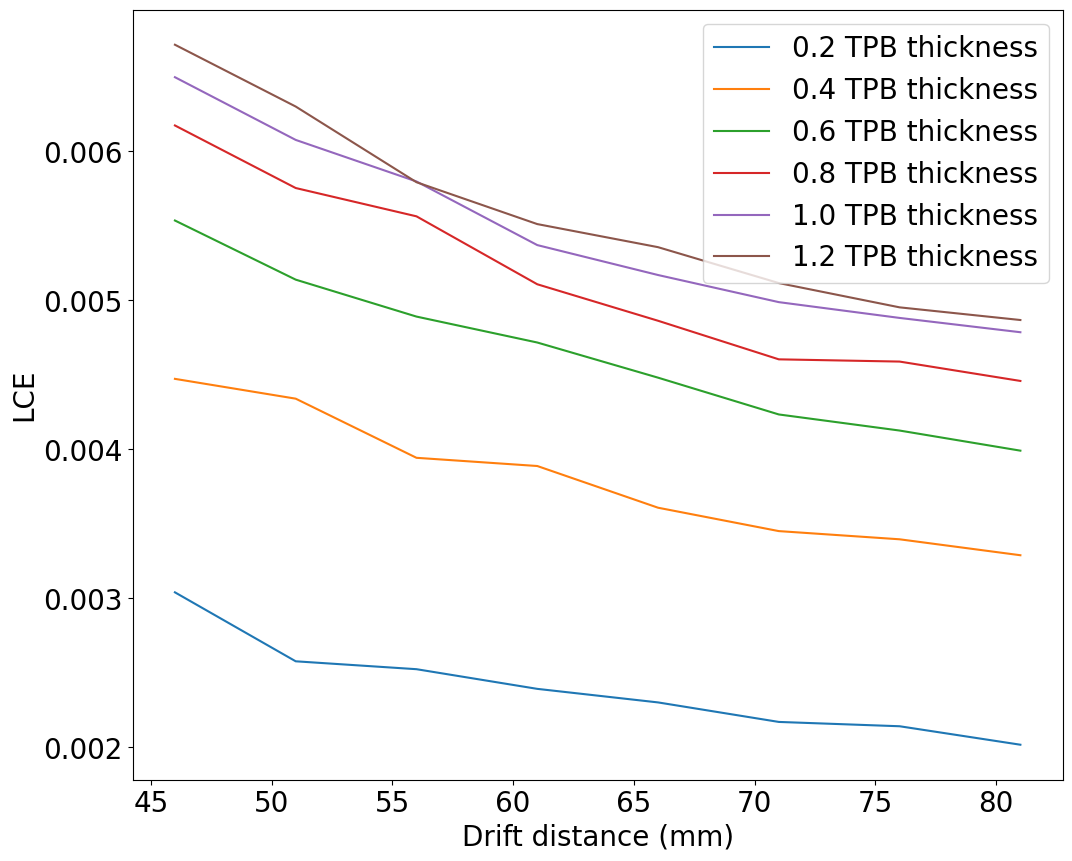

In [64]:
light_pos = np.arange(40, step=5)
dist      = light_pos - (-46)
nevts     = 1e6
effs      = np.arange(0.1, 0.61, 0.1)
thicks    = np.arange(0.2, 1.21, 0.2)
tpb_eff   = 0.6

for thick in thicks:
    lc        = []
    for p in light_pos:
        input_path = f'/home/ander/Work/GaP/nexus_quick_sim/data/optical_photons/lc_col_along_drift_eff{tpb_eff:.1f}_thick{thick:.1f}/ar_light_z{p:.0f}mm_{nevts:.0f}.h5'
        mcdata     = mcio.load_mcsensor_response_df(glob.glob(input_path)[0]).reset_index()
        lc.append(len(mcdata)/nevts)
    
    lc = np.array(lc)
    plt.plot(dist, lc, label=f'{thick:.1f} TPB thickness')
    
plt.legend()
plt.xlabel('Drift distance (mm)')
plt.ylabel('LCE')  

/home/ander/Work/IC/invisible_cities/io/mcinfo_io.py:716: UserWarning:  No binning info available.
  warnings.warn(' No binning info available.', UserWarning)
/home/ander/Work/IC/invisible_cities/io/mcinfo_io.py:716: UserWarning:  No binning info available.
  warnings.warn(' No binning info available.', UserWarning)
/home/ander/Work/IC/invisible_cities/io/mcinfo_io.py:716: UserWarning:  No binning info available.
  warnings.warn(' No binning info available.', UserWarning)
/home/ander/Work/IC/invisible_cities/io/mcinfo_io.py:716: UserWarning:  No binning info available.
  warnings.warn(' No binning info available.', UserWarning)
/home/ander/Work/IC/invisible_cities/io/mcinfo_io.py:716: UserWarning:  No binning info available.
  warnings.warn(' No binning info available.', UserWarning)
/home/ander/Work/IC/invisible_cities/io/mcinfo_io.py:716: UserWarning:  No binning info available.
  warnings.warn(' No binning info available.', UserWarning)
/home/ander/Work/IC/invisible_cities/io/mcinfo

Text(0, 0.5, 'LCE')

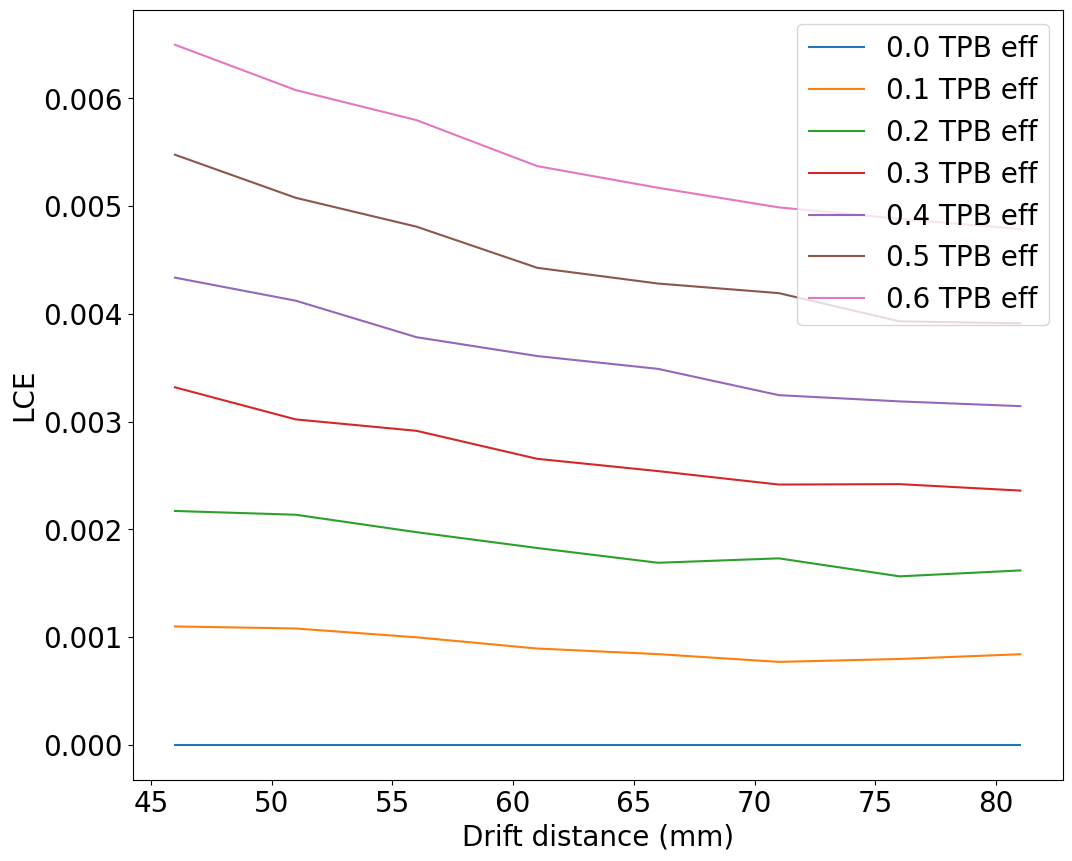

In [66]:
light_pos = np.arange(40, step=5)
dist      = light_pos - (-46)
nevts     = 1e6
effs      = np.arange(0., 0.61, 0.1)
thick     = 1

for tpb_eff in effs:
    lc        = []
    for p in light_pos:
        input_path = f'/home/ander/Work/GaP/nexus_quick_sim/data/optical_photons/lc_col_along_drift_eff{tpb_eff:.1f}_thick{thick:.1f}/ar_light_z{p:.0f}mm_{nevts:.0f}.h5'
        mcdata     = mcio.load_mcsensor_response_df(glob.glob(input_path)[0]).reset_index()
        lc.append(len(mcdata)/nevts)
    
    lc = np.array(lc)
    plt.plot(dist, lc, label=f'{tpb_eff:.1f} TPB eff')
    
plt.legend()
plt.xlabel('Drift distance (mm)')
plt.ylabel('LCE') 

#### vs Rad distance

Text(0, 0.5, 'LCE')

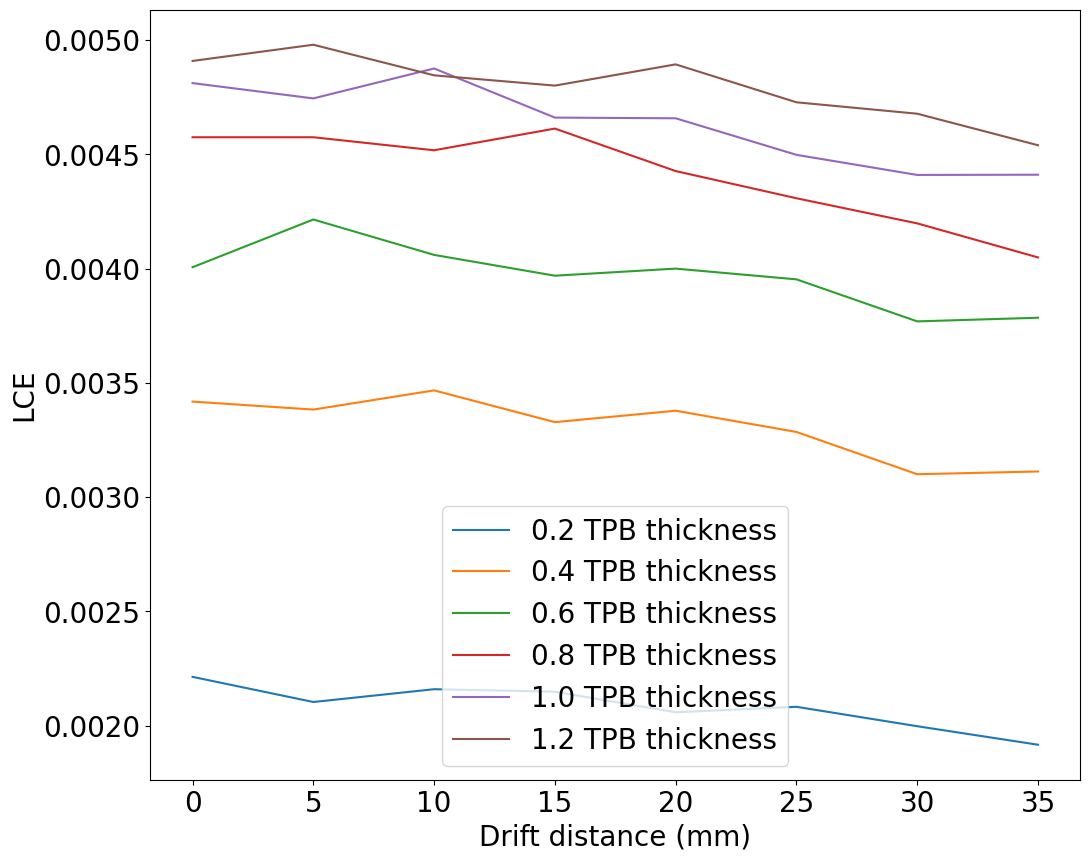

In [69]:
light_pos = np.arange(40, step=5)
dist      = light_pos - (-46)
nevts     = 1e6
effs      = np.arange(0.1, 0.61, 0.1)
thicks    = np.arange(0.2, 1.21, 0.2)
tpb_eff   = 0.6

for thick in thicks:
    lc        = []
    for p in light_pos:
        input_path = f'/home/ander/Work/GaP/nexus_quick_sim/data/optical_photons/lc_col_along_drift_eff{tpb_eff:.1f}_thick{thick:.1f}/ar_light_cath_r{p:.0f}mm_{nevts:.0f}.h5'
        mcdata     = mcio.load_mcsensor_response_df(glob.glob(input_path)[0]).reset_index()
        lc.append(len(mcdata)/nevts)
    
    lc = np.array(lc)
    plt.plot(light_pos, lc, label=f'{thick:.1f} TPB thickness')
    
plt.legend()
plt.xlabel('Drift distance (mm)')
plt.ylabel('LCE')  

/home/ander/Work/IC/invisible_cities/io/mcinfo_io.py:716: UserWarning:  No binning info available.
  warnings.warn(' No binning info available.', UserWarning)
/home/ander/Work/IC/invisible_cities/io/mcinfo_io.py:716: UserWarning:  No binning info available.
  warnings.warn(' No binning info available.', UserWarning)
/home/ander/Work/IC/invisible_cities/io/mcinfo_io.py:716: UserWarning:  No binning info available.
  warnings.warn(' No binning info available.', UserWarning)
/home/ander/Work/IC/invisible_cities/io/mcinfo_io.py:716: UserWarning:  No binning info available.
  warnings.warn(' No binning info available.', UserWarning)
/home/ander/Work/IC/invisible_cities/io/mcinfo_io.py:716: UserWarning:  No binning info available.
  warnings.warn(' No binning info available.', UserWarning)
/home/ander/Work/IC/invisible_cities/io/mcinfo_io.py:716: UserWarning:  No binning info available.
  warnings.warn(' No binning info available.', UserWarning)
/home/ander/Work/IC/invisible_cities/io/mcinfo

Text(0, 0.5, 'LCE')

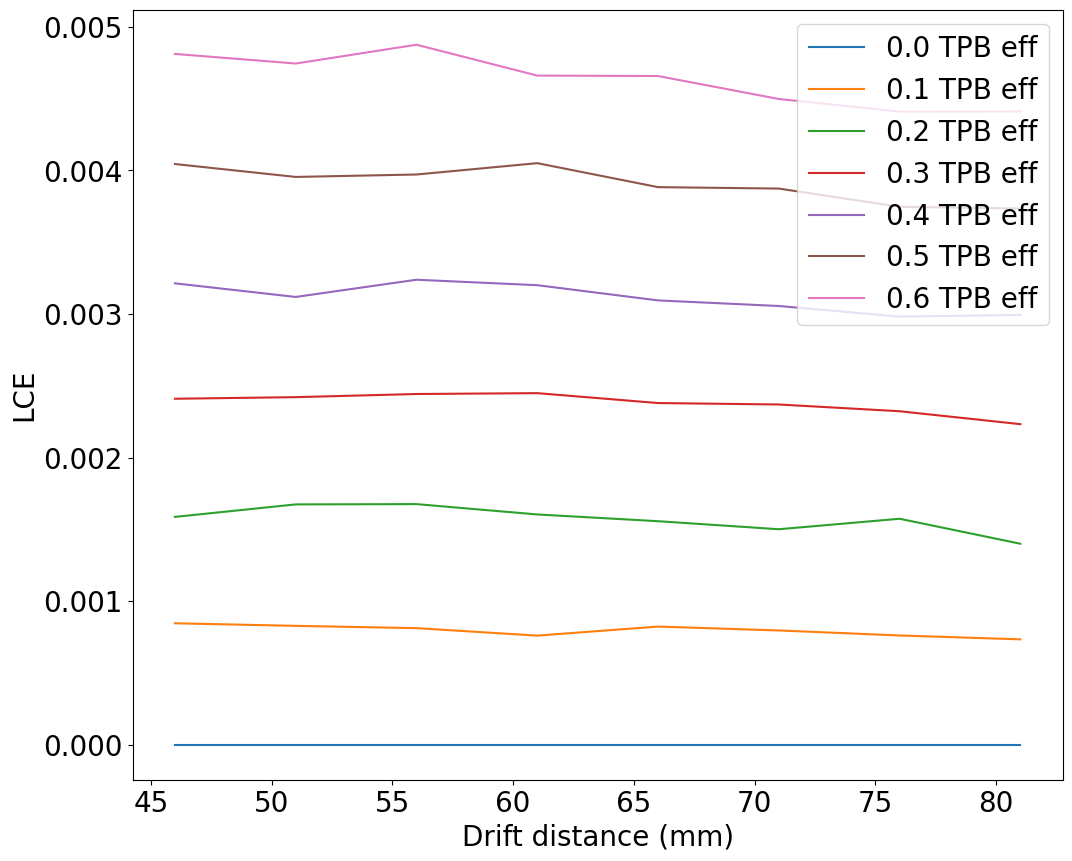

In [72]:
light_pos = np.arange(40, step=5)
dist      = light_pos - (-46)
nevts     = 1e6
effs      = np.arange(0., 0.61, 0.1)
thick     = 1

for tpb_eff in effs:
    lc        = []
    for p in light_pos:
        input_path = f'/home/ander/Work/GaP/nexus_quick_sim/data/optical_photons/lc_col_along_drift_eff{tpb_eff:.1f}_thick{thick:.1f}/ar_light_cath_r{p:.0f}mm_{nevts:.0f}.h5'
        mcdata     = mcio.load_mcsensor_response_df(glob.glob(input_path)[0]).reset_index()
        lc.append(len(mcdata)/nevts)
    
    lc = np.array(lc)
    plt.plot(dist, lc, label=f'{tpb_eff:.1f} TPB eff')
    
plt.legend()
plt.xlabel('Drift distance (mm)')
plt.ylabel('LCE') 

### Alpha position MC

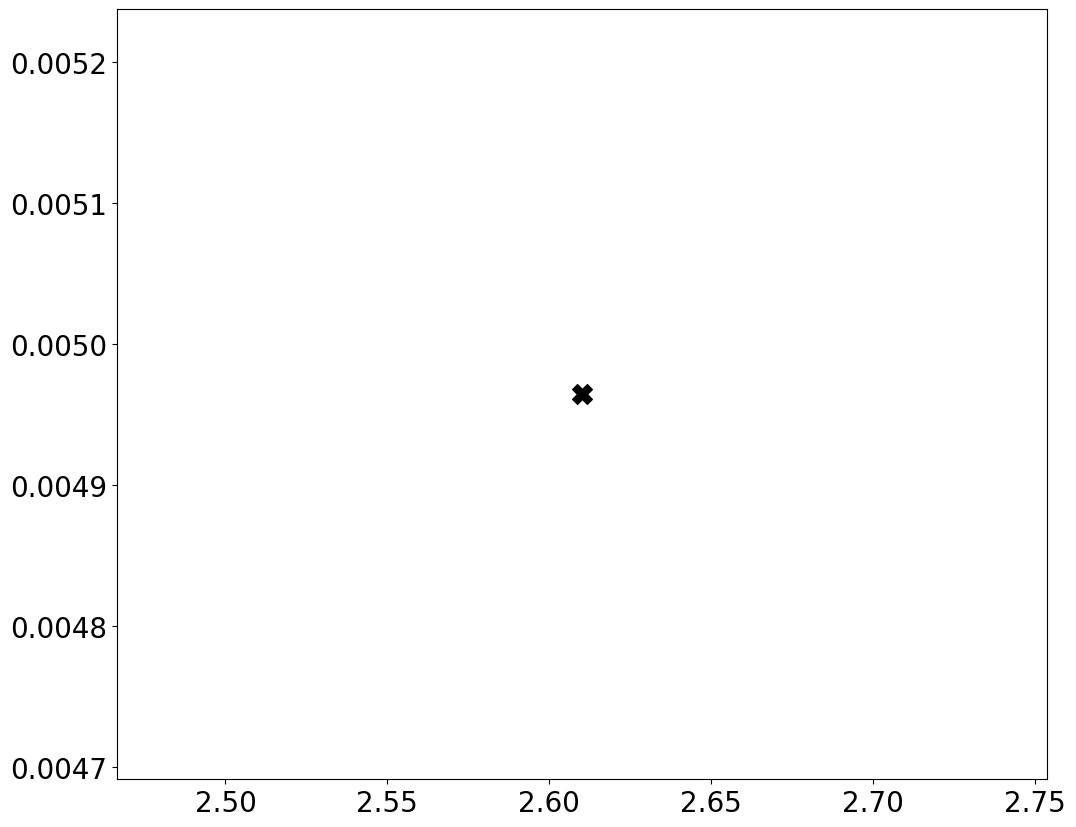

In [237]:
sim_phot   = []
yield_phot = []
alpha_e = 5.486

plist = pressures[:1]
for p in plist:
#    input_path = glob.glob(f'/home/ander/Work/GaP/nexus_quick_sim/data/alpha_data/NoTPB_XeLight/alpha_{alpha_e:.3f}MeV_1e2_{p}bar_yield*.h5')[0]
    input_path = glob.glob(f'/home/ander/Work/GaP/nexus_quick_sim/data/alpha_{alpha_e:.3f}MeV_1e2_{p}bar_yield*.h5')[0]
    mcdata     = mcio.load_mcsensor_response_df(input_path).reset_index()
    hits       = mcio.load_mchits_df(input_path).reset_index()
    hits['total_energy'] = hits.groupby('event_id').energy.transform('sum')

    sel = hits.total_energy>5
    evt_id = hits[sel].event_id.unique()
    sel_evt = mcdata.event_id.isin(evt_id)
    
    all_sensors_mc = mcdata[sel_evt].groupby('event_id').charge.sum().reset_index()

    
    det_photons_mc = mcdata.groupby(['event_id', 'sensor_id']).charge.sum().reset_index()
    det_photons_mc = det_photons_mc[det_photons_mc.event_id.isin(all_sensors_mc.event_id.unique())]
    sim_phot.append([det_photons_mc[det_photons_mc.sensor_id==i].charge.mean() for i in range(7)])
    
    yid   = input_path.find('yield')
    yield_phot.append(int(input_path[yid+5:yid+10]))
    

yield_phot = np.array(yield_phot) * alpha_e
sim_phot   = np.array(sim_phot)

#for i in range(7):
#    plt.scatter(plist, sim_phot[:, i]/yield_phot);
#    plt.scatter(plist, sim_phot[:, i]);


plt.scatter(plist, sim_phot.sum(axis=1)/yield_phot, marker='X', s=200, c='k');

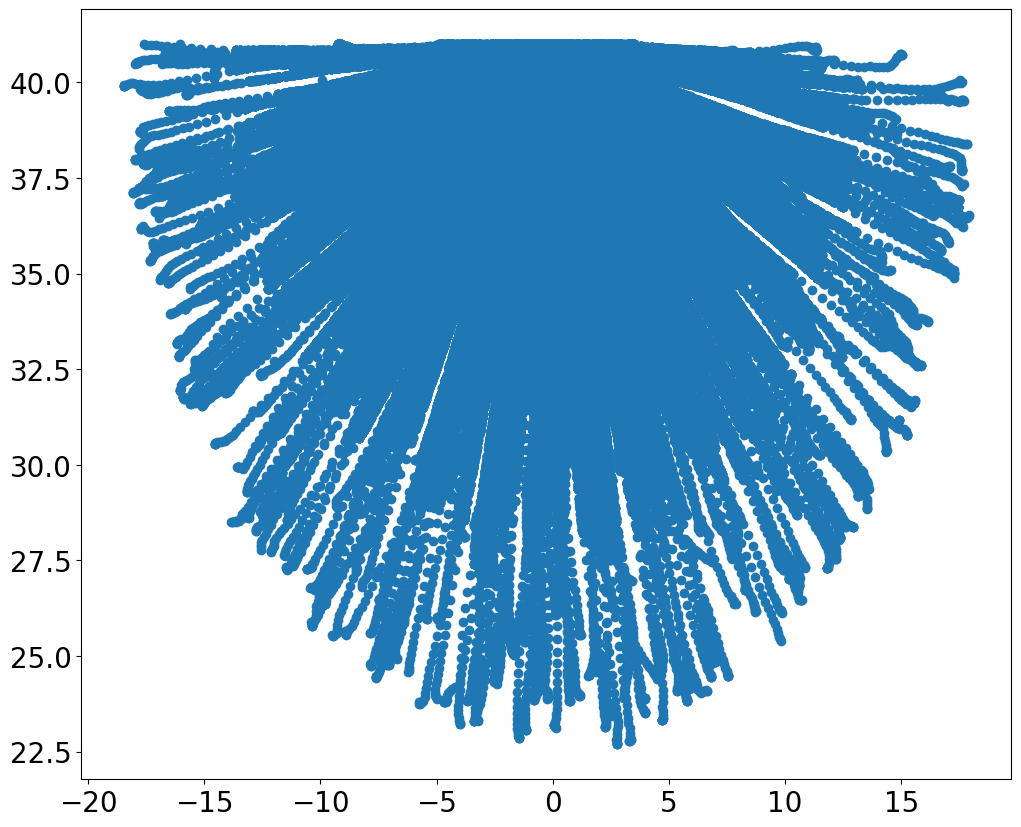

In [238]:
hits = mcio.load_mchits_df(input_path).reset_index()
plt.scatter(hits.x, hits.z)

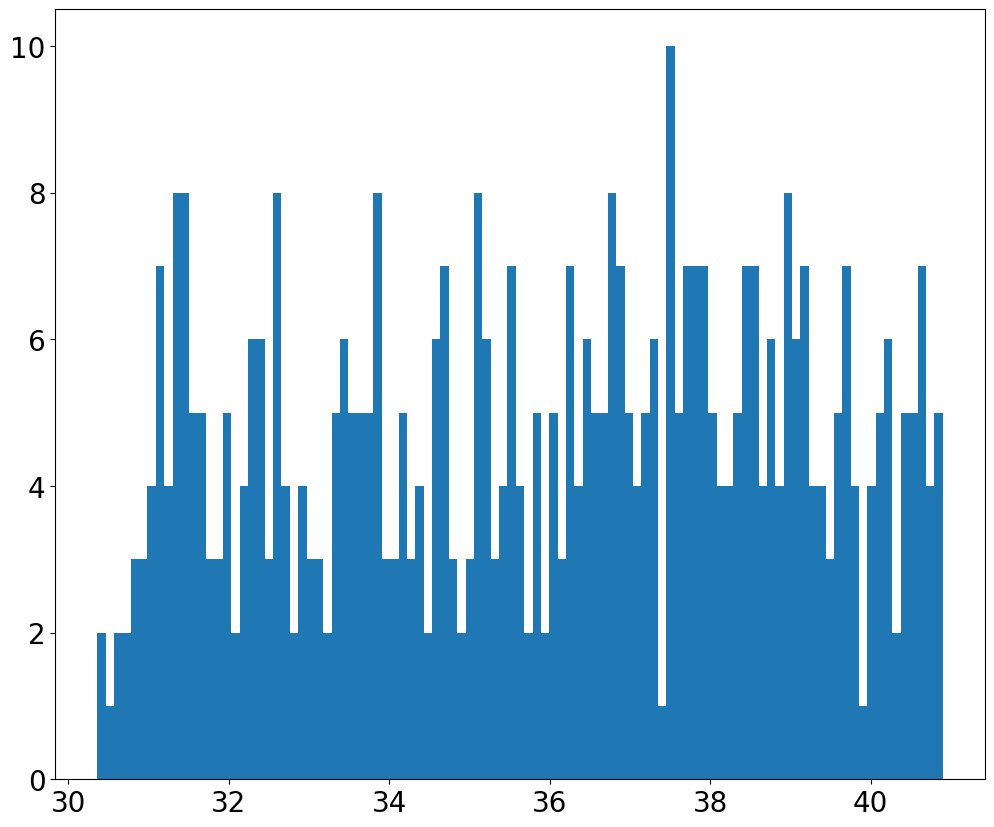

In [239]:
hits['total_energy'] = hits.groupby('event_id').energy.transform('sum')
hits['dist'] = np.linalg.norm(hits.loc[:, ['x', 'y', 'z']]-np.array([0, 0, 41]), axis=1)
hits = hits[hits.total_energy>5]
val  = hits.groupby('event_id').apply(lambda x : coref.weighted_mean_and_std(x.z, x.energy)[0])
#val2 = [coref.weighted_mean_and_std(hits[hits.event_id==eid].x, hits[hits.event_id==eid].energy)[0] for eid in hits.event_id.unique()]
plt.hist(val, 101);
#plt.hist(val2, 101);

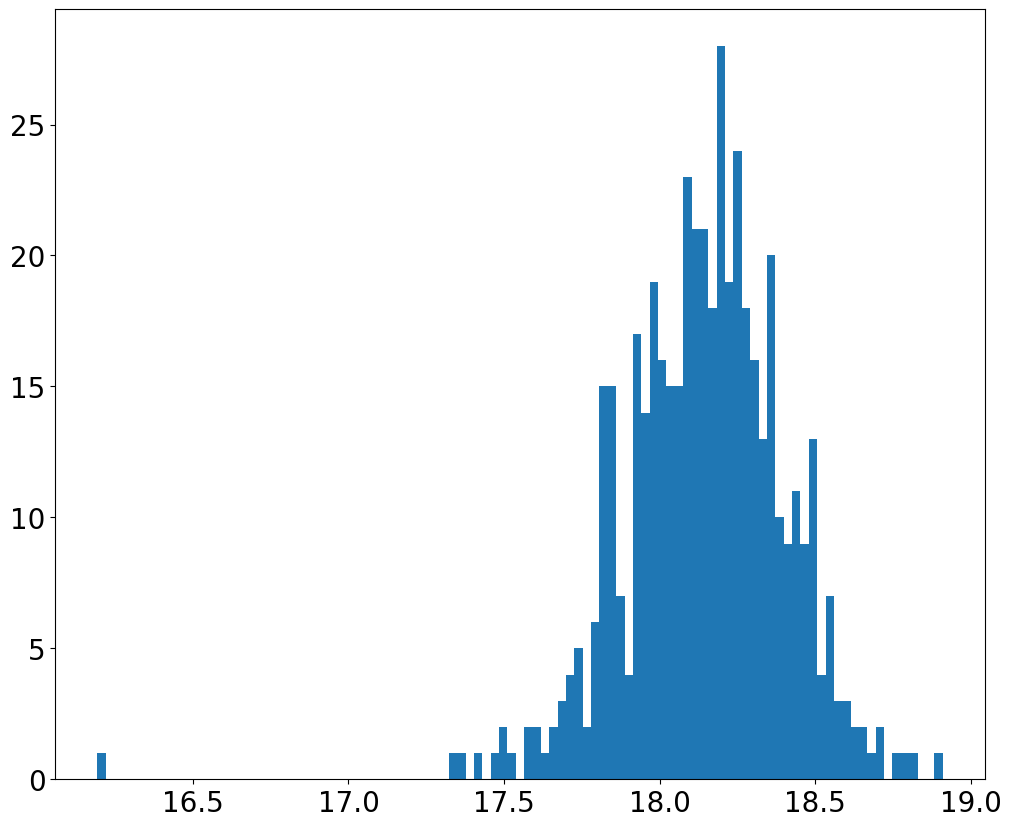

In [240]:
plt.hist(hits.groupby('event_id').dist.max(), 101);

Text(0, 0.5, 'LCE')

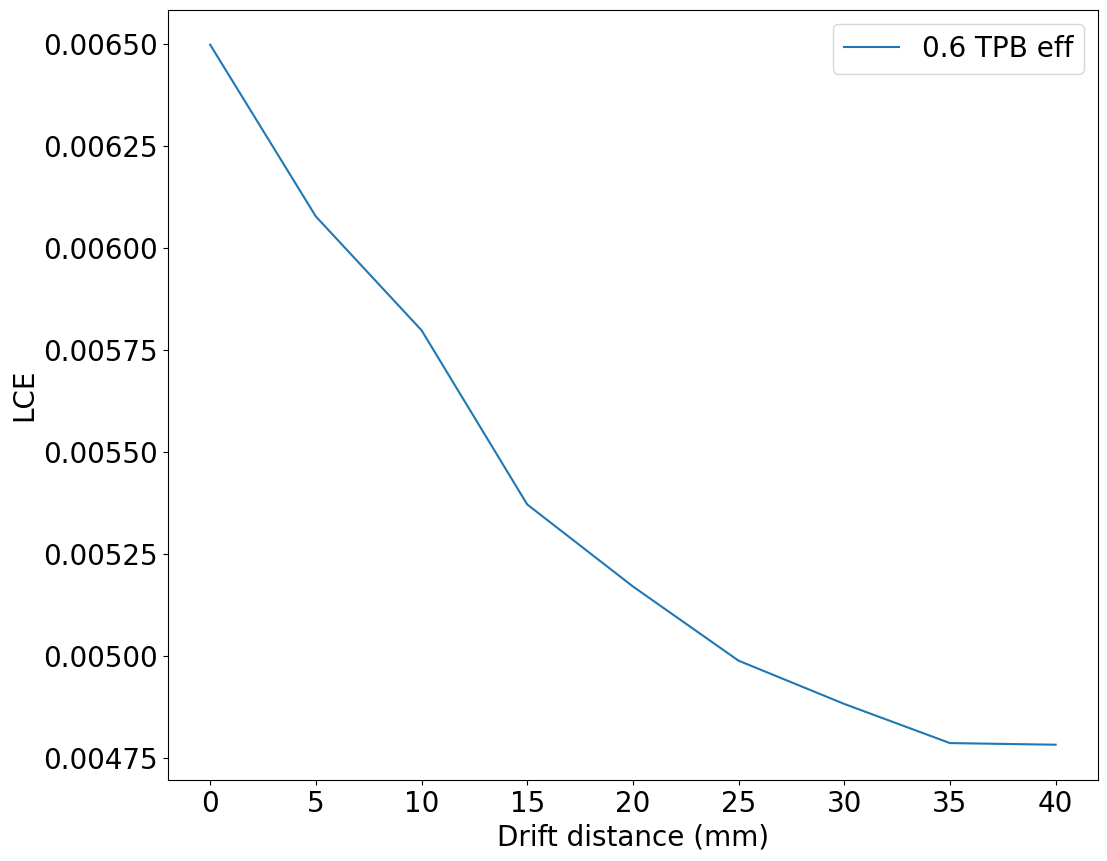

In [241]:
light_pos = np.arange(41, step=5)
dist      = light_pos - (-46)
nevts     = 1e6
effs      = np.arange(0., 0.61, 0.1)
thick     = 1
tpb_eff   = 0.6

lc        = []
for p in light_pos:
    input_path = f'/home/ander/Work/GaP/nexus_quick_sim/data/optical_photons/lc_col_along_drift_eff{tpb_eff:.1f}_thick{thick:.1f}/ar_light_z{p:.0f}mm_{nevts:.0f}.h5'
    mcdata     = mcio.load_mcsensor_response_df(glob.glob(input_path)[0]).reset_index()
    lc.append(len(mcdata)/nevts)

lc = np.array(lc)
#plt.plot(dist, lc, label=f'{tpb_eff:.1f} TPB eff')
plt.plot(light_pos, lc, label=f'{tpb_eff:.1f} TPB eff')
    
lc_fun = interpolate.interp1d(light_pos, lc, kind='linear', fill_value='extrapolate')

plt.legend()
plt.xlabel('Drift distance (mm)')
plt.ylabel('LCE') 

In [242]:
yield_MeV = yield_phot/alpha_ene*1e6
hits['lc_col_hit']    = lc_fun(hits.z)
hits['inter_photons'] = hits.lc_col_hit*hits.energy*yield_MeV


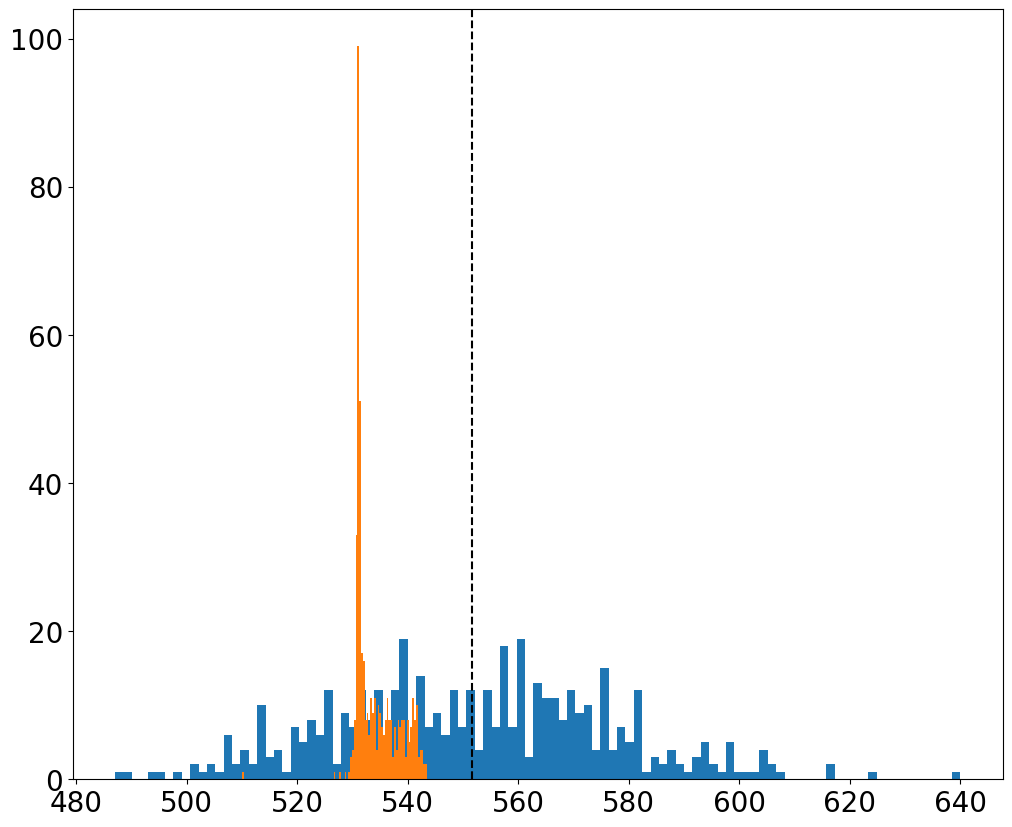

In [243]:
plt.hist(all_sensors_mc.charge, 101)
plt.hist(hits.groupby('event_id').inter_photons.sum(), 101)
plt.axvline(sim_phot.sum(), c='k', ls='--')

In [244]:
ave_lc = hits.groupby('event_id').apply(lambda x : coref.weighted_mean_and_std(x.lc_col_hit, x.energy)[0])
print(f'Average LC from optical photons interpolation {ave_lc.mean()}') 
print(f'Average LC from simulation {sim_phot.sum()/yield_phot}')

Average LC from optical photons interpolation 0.004811198923651422
Average LC from simulation [0.0049644]


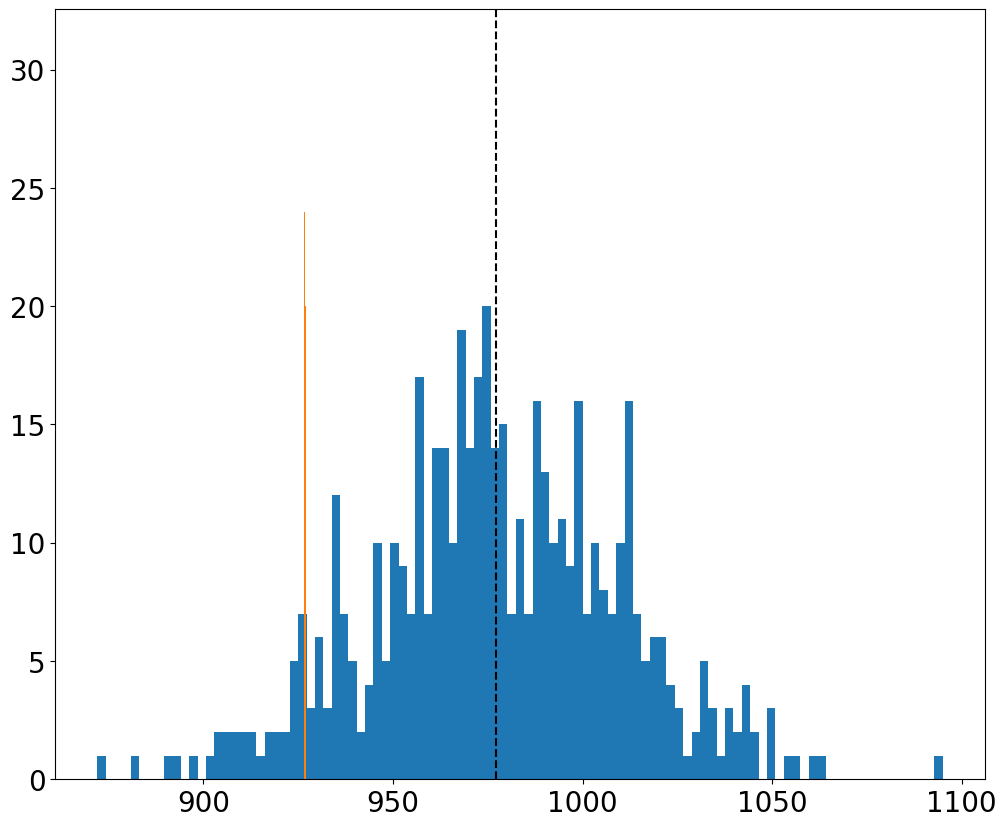

In [235]:
plt.hist(all_sensors_mc.charge, 101)
plt.hist(hits.groupby('event_id').inter_photons.sum(), 101)
plt.axvline(sim_phot.sum(), c='k', ls='--')

In [236]:
ave_lc = hits.groupby('event_id').apply(lambda x : coref.weighted_mean_and_std(x.lc_col_hit, x.energy)[0])
print(f'Average LC from optical photons interpolation {ave_lc.mean()}') 
print(f'Average LC from simulation {sim_phot.sum()/yield_phot}')

Average LC from optical photons interpolation 0.004782518714813964
Average LC from simulation [0.00503902]
